In [28]:
from google.colab import files

uploaded = files.upload()   # choose Restaurant_Reviews.tsv from your system


Saving Restaurant_Reviews.tsv to Restaurant_Reviews (1).tsv


In [29]:
# Basic libraries
import numpy as np
import pandas as pd
import re
import pickle

# NLP libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# ML libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the TSV file (tab separated)
data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

# See first few rows
data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [30]:
# Load the TSV file (tab separated)
data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

# See first few rows
data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

corpus = []

for review in data['Review']:
    # 1. Keep only letters
    review = re.sub('[^a-zA-Z]', ' ', review)
    # 2. Lowercase
    review = review.lower()
    # 3. Split into words
    words = review.split()
    # 4. Remove stopwords & apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words]
    # 5. Join back into one string
    cleaned_review = ' '.join(words)
    corpus.append(cleaned_review)

# See few cleaned reviews
corpus[:5]


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [31]:
data.info()
data['Liked'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,count
Liked,
1,500
0,500


In [32]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

corpus = []

for review in data['Review']:
    # 1. Keep only letters
    review = re.sub('[^a-zA-Z]', ' ', review)
    # 2. Lowercase
    review = review.lower()
    # 3. Split into words
    words = review.split()
    # 4. Remove stopwords & apply stemming
    words = [ps.stem(word) for word in words if word not in stop_words]
    # 5. Join back into one string
    cleaned_review = ' '.join(words)
    corpus.append(cleaned_review)

# See few cleaned reviews
corpus[:5]


['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [33]:
# Convert text to numbers using TF-IDF
tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(corpus).toarray()

# Target labels (0 = not liked, 1 = liked)
y = data['Liked'].values

X.shape, y.shape


((1000, 1500), (1000,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% test
    random_state=0
)

X_train.shape, X_test.shape


((800, 1500), (200, 1500))

In [36]:
model = BernoulliNB()
model.fit(X_train, y_train)


BernoulliNB()

In [37]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Optional: detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        97
           1       0.77      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200


Confusion Matrix:
[[73 24]
 [22 81]]


In [39]:
def clean_review(text):
    # Same cleaning steps as before
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

def predict_review(text):
    cleaned = clean_review(text)
    vec = tfidf.transform([cleaned]).toarray()
    pred = model.predict(vec)[0]
    if pred == 1:
        return "Positive (Liked)"
    else:
        return "Negative (Not liked)"

# Try some reviews
print(predict_review("The food was amazing and the staff were very friendly"))
print(predict_review("The service was too slow and the food was cold"))
print(predict_review("Not tasty and the texture was just nasty"))


Positive (Liked)
Negative (Not liked)
Negative (Not liked)


In [40]:
# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save trained model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Saved model and vectorizer as .pkl files")


Saved model and vectorizer as .pkl files


In [41]:
from google.colab import files

files.download('tfidf_vectorizer.pkl')
files.download('sentiment_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Liked'>

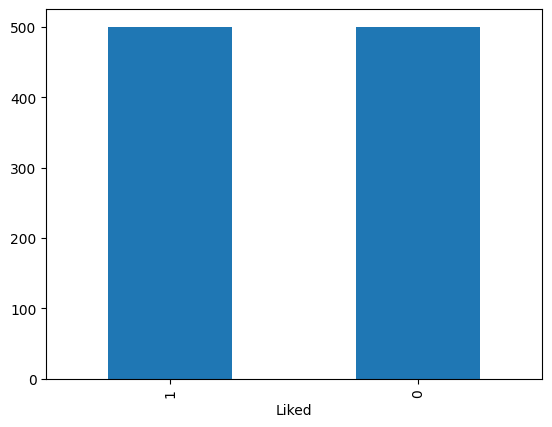

In [42]:
data['Liked'].value_counts().plot(kind='bar')


In [43]:
from wordcloud import WordCloud


In [44]:
models = {
    "BernoulliNB": BernoulliNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [18]:
from sklearn.neighbors import KNeighborsClassifier


In [46]:
models = {
    "BernoulliNB": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}


In [47]:
accuracy_results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


BernoulliNB Accuracy: 0.7700
Logistic Regression Accuracy: 0.7500
SVM Accuracy: 0.7300
Random Forest Accuracy: 0.7250
KNN Accuracy: 0.6850


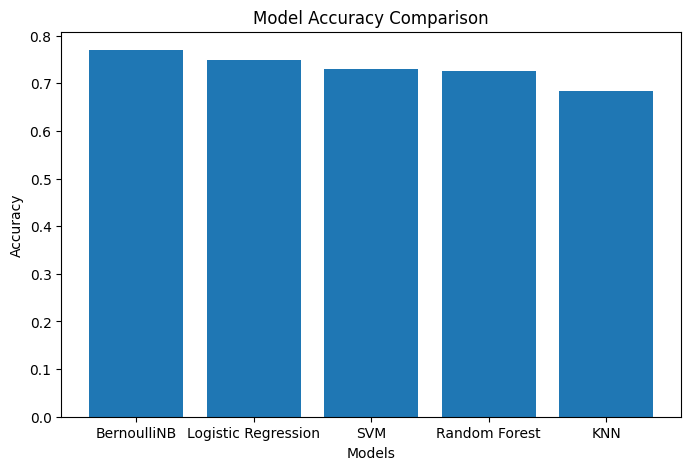

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# New TF-IDF: more features + unigrams + bigrams
tfidf_v2 = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),   # 1-gram and 2-gram
    min_df=2
)

X2 = tfidf_v2.fit_transform(corpus).toarray()
y2 = data['Liked'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=0
)

X2_train.shape, X2_test.shape


((800, 945), (200, 945))

In [27]:
from sklearn.svm import LinearSVC

best_acc = 0
best_C = None
best_model = None

for C in [0.1, 0.5, 1.0, 2.0]:
    clf = LinearSVC(C=C)
    clf.fit(X2_train, y2_train)
    y2_pred = clf.predict(X2_test)
    acc = accuracy_score(y2_test, y2_pred)
    print(f"LinearSVC  C={C} -> Accuracy={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_C = C
        best_model = clf

print("\nBest C:", best_C, "Best accuracy:", best_acc)


LinearSVC  C=0.1 -> Accuracy=0.7450
LinearSVC  C=0.5 -> Accuracy=0.7400
LinearSVC  C=1.0 -> Accuracy=0.7250
LinearSVC  C=2.0 -> Accuracy=0.7100

Best C: 0.1 Best accuracy: 0.745
